<a href="https://colab.research.google.com/github/rowida2/hands-on-ml-study/blob/main/Ch2-End-to-End%20ML%20Project/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic Data Loading

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    # Define the path where the compressed dataset will be stored
    tarball_path = Path("datasets/housing.tgz")

    # If the dataset file does not exist, download it
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)

    # Extract the compressed file into the datasets folder
    with tarfile.open(tarball_path) as housing_tarball:
        housing_tarball.extractall(path="datasets")

    # Load the CSV file into a Pandas DataFrame
    return pd.read_csv(Path("datasets/housing/housing.csv"))


housing = load_housing_data()

/tmp/ipython-input-4290794199.py:18: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


# Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# EDA

In [4]:
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.shape

(20640, 10)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


only ocean_proximity is object
* The column 'ocean_proximity' represents the location of the district relative to the ocean
* It is a categorical attribute with values like 'INLAND', 'NEAR BAY', 'NEAR OCEAN', '<1H OCEAN', and 'ISLAND'


In [7]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

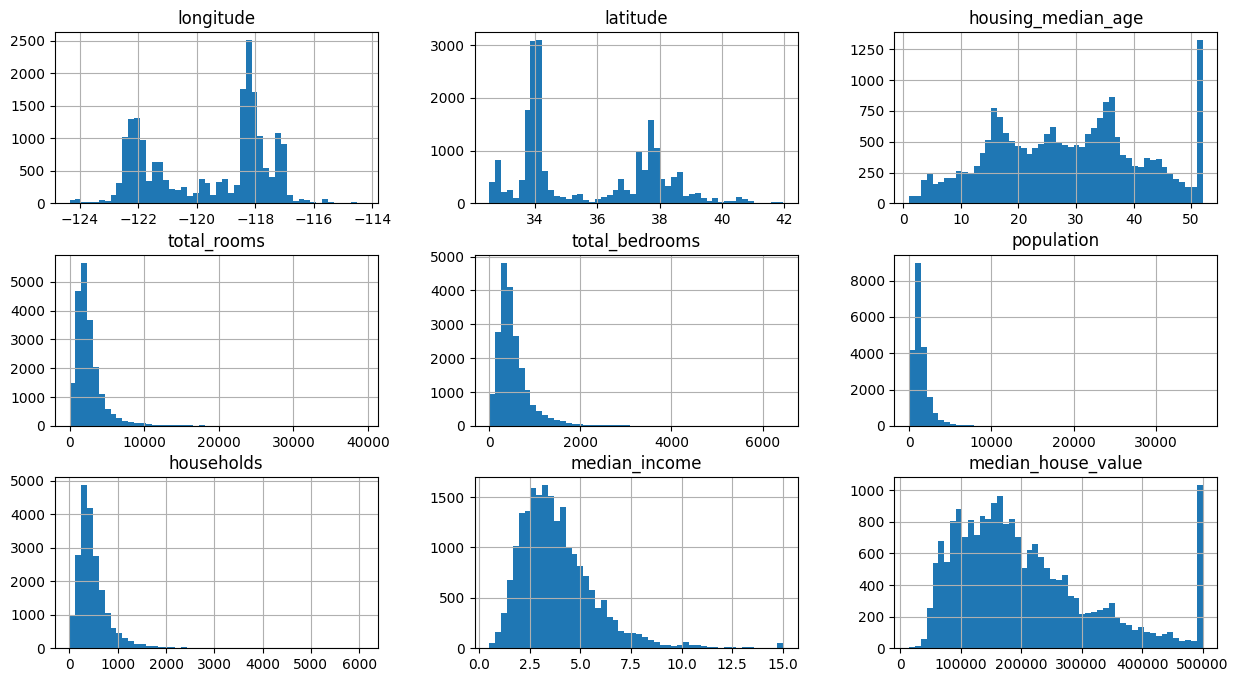

In [9]:
housing.hist(bins=50, figsize=(15,8))

# Stable train-test split using hashing

In [16]:
import hashlib

def test_set_check(identifier, test_ratio=0.2):
    hash_val = int(hashlib.md5(np.int64(identifier)).hexdigest(), 16)
    return hash_val % 100 < test_ratio * 100

def split_train_test_by_id(data, id_column, test_ratio=0.2):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]



In [18]:
housing_with_id = housing.reset_index()

In [19]:
train_set, test_set = split_train_test_by_id( housing_with_id, id_column="index", test_ratio=0.2)


In [20]:
len(test_set)

3952

In [21]:
len(train_set)

16688

In [24]:
housing=train_set.copy()

# Visualize the Data

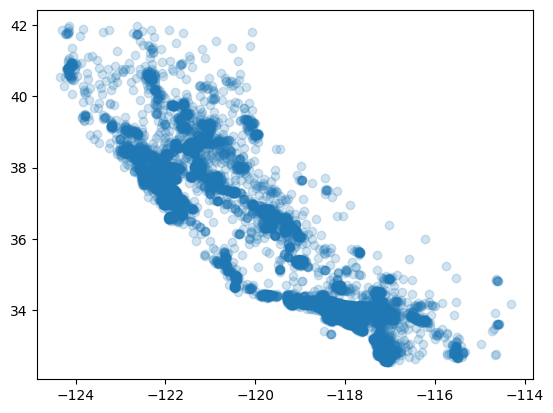

In [38]:
#Visualize districts
plt.scatter(housing["longitude"], housing["latitude"], alpha=0.2)

<Axes: xlabel='longitude', ylabel='latitude'>

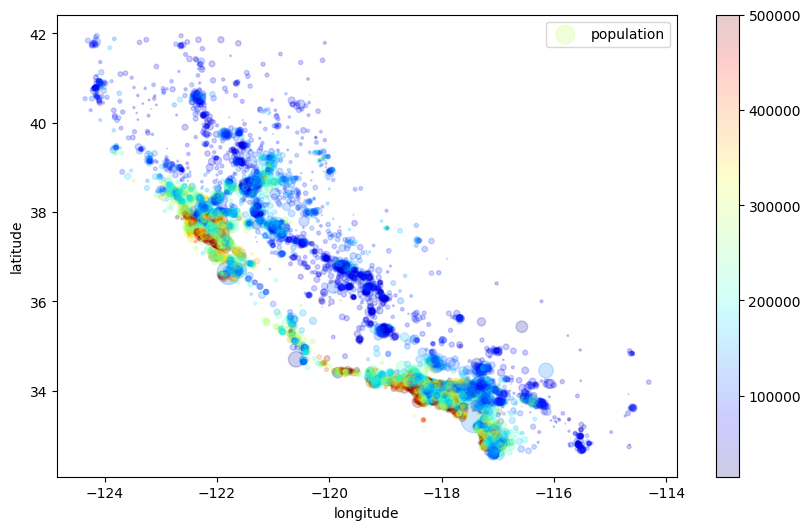

In [43]:
housing.plot(kind="scatter",
            x="longitude",
            y="latitude",
            alpha=0.2,
            s=housing["population"]/100,
            label="population",
            c=housing["median_house_value"],
            cmap= "jet",
            colorbar=True,
            legend=True,
            sharex=False,
            figsize=(10, 6) )

### California housing prices: red is expensive, blue is cheap, larger circles indicate areas with a larger population